In [ ]:
import numpy as np
SEED = 45
np.random.seed(SEED)
import matplotlib.pyplot as plt
from data import generate_data_second_order 
from models import GibbsSamplerLLFM
from evals import latent_features, latent_features_dominant_to_file
import matplotlib.pyplot as plt


In [2]:
#Parameters
K=10            
alpha=1.1
sigma_w=2.0
sigma_b=1.0
#bias=[-5, -5, -5, -5]
mu_b = -1.0 #if sampling
n_iter=3000
burn=1000
n_subsample=1000
ax_values = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50, 55, 60]
#ax_values = [8, 10, 12, 14, 16, 18]
#ax_values = [0, 2, 4, 8, 20, 30]
conds_list = [[1,0,0], [0,1,0], [0,0,1], [0,1,1]]
n_z_samples = 100
print(ax_values)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40, 45, 50, 55, 60]


In [3]:
posterior_probs_all = {str(conds): [] for conds in conds_list}
avg_features_list = []
dominant_features_list = []
with open('latent_features_dominant4.txt', 'w') as f:
    f.write('Parameters:\n')
    f.write(f'K={K}, alpha={alpha}, sigma_w={sigma_w}, sigma_b={sigma_b}, mu_b={mu_b}\n\n')
    f.write('Mcmc parameters:\n')   
    f.write(f'n_iter={n_iter}, burn={burn}, n_subsample={n_subsample}\n\n')
for axnum in ax_values:

    # Generate dataset
    Data = generate_data_second_order(axnum=axnum)
    
    # Run Gibbs sampler
    sampler = GibbsSamplerLLFM(Data, K=K, n_iter=n_iter, alpha=alpha, sigma_w=sigma_w, mu_b=mu_b, sigma_b=sigma_b, burn=burn, n_subsample=n_subsample)
    sampler.run(verbose=False)
    sampler.get_posterior_samples()
    
    avg_features = latent_features(threshold=5, Z_post=sampler.good_samples_Z, W_post=sampler.good_samples_W, b_post=sampler.good_samples_b)
    avg_features_list.append(avg_features)
    dominant_features = latent_features_dominant_to_file('latent_features_dominant4.txt', threshold=5, Z_post=sampler.good_samples_Z, W_post=sampler.good_samples_W, b_post=sampler.good_samples_b, header=f'Number of A-X pairs: {axnum}.\n\n')
    dominant_features_list.append(dominant_features)

    # ---- Posterior predictive probabilities ----
    for conds in conds_list:
        p_y3 = sampler.posterior_predictive(
            cond_obs=conds, n_z_samples=n_z_samples
        )
        posterior_probs_all[str(conds)].append(p_y3)

Posterior grouping by number of active features

Number of samples with zero active features: 0/1000

Group with 2 active features:
  Number of posterior samples: 76/1000
  Average usage per feature (size-biased order):
[108.86842105  19.88157895]
  Average weights:
[[  3.41315815 -14.81098797  -4.25774274   5.52059307]
 [ -4.46123459  -2.10321648   5.00380485   1.48244708]]
  Average Bias:
[ 0.03573852 -1.08871381 -0.1773079   0.06241025]
--------------------------------------------------
Group with 3 active features:
  Number of posterior samples: 253/1000
  Average usage per feature (size-biased order):
[105.75494071  72.35177866  36.36758893]
  Average weights:
[[  1.9701394  -11.40807395  -2.36694105   3.96091931]
 [  1.78333213  -6.80117652  -2.11155492   2.0874738 ]
 [ -1.56468227  -3.55472056   1.68210666   1.13938333]]
  Average Bias:
[-0.08620822 -1.06866369 -0.08990258  0.06043166]
--------------------------------------------------
Group with 4 active features:
  Number of p

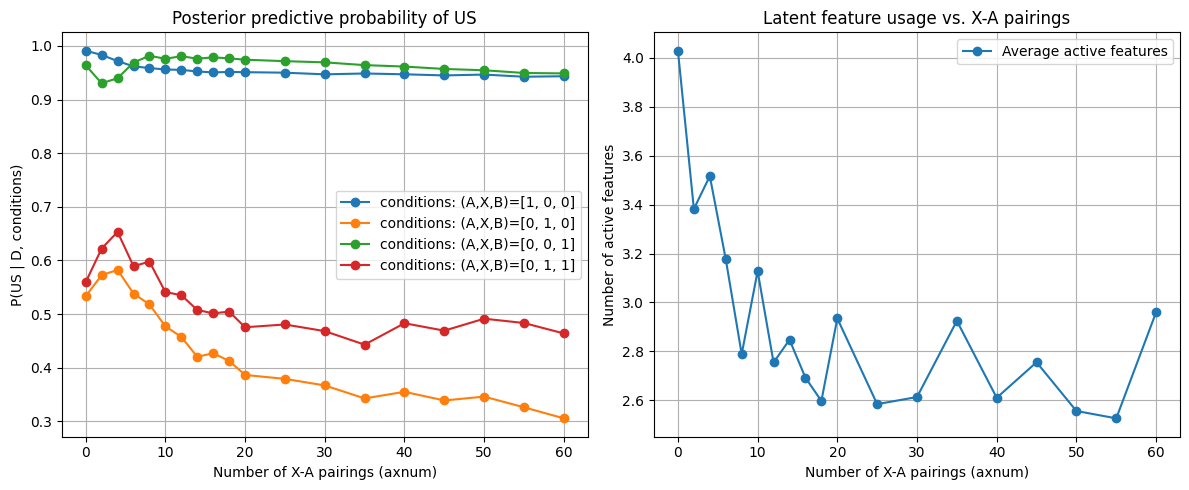

In [4]:
import matplotlib.pyplot as plt

# ------------------------------
# Slice arrays to remove last two points
# ------------------------------
ax_plot = ax_values
avg_features_plot = avg_features_list

# ------------------------------
# Plot results
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# ------------------------------
# Posterior predictive probabilities
# ------------------------------
for conds in conds_list:
    probs = posterior_probs_all[str(conds)]  # remove last two points
    axes[0].plot(
        ax_plot,
        probs,
        marker='o',
        label=f'conditions: (A,X,B)={conds}'
    )

axes[0].set_xlabel("Number of X-A pairings (axnum)")
axes[0].set_ylabel("P(US | D, conditions)")
axes[0].set_title("Posterior predictive probability of US")
axes[0].grid(True)
axes[0].legend()

# ------------------------------
# Latent feature statistics
# ------------------------------
axes[1].plot(
    ax_plot,
    avg_features_plot,
    marker='o',
    label="Average active features"
)

axes[1].set_xlabel("Number of X-A pairings (axnum)")
axes[1].set_ylabel("Number of active features")
axes[1].set_title("Latent feature usage vs. X-A pairings")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.savefig("posterior_predictive_and_features4.png", dpi=300)
plt.show()

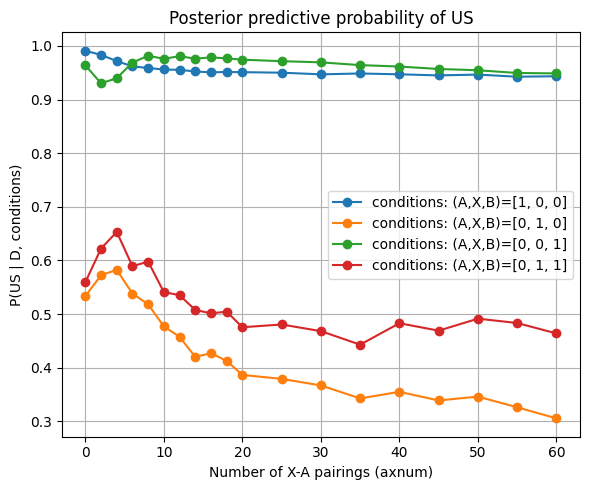

In [5]:
import matplotlib.pyplot as plt

# ------------------------------
# Use full arrays (no slicing)
# ------------------------------
ax_plot = ax_values

# ------------------------------
# Plot results (single plot)
# ------------------------------
plt.figure(figsize=(6,5))

# ------------------------------
# Posterior predictive probabilities
# ------------------------------
for conds in conds_list:
    probs = posterior_probs_all[str(conds)]
    plt.plot(
        ax_plot,
        probs,
        marker='o',
        label=f'conditions: (A,X,B)={conds}'
    )

plt.xlabel("Number of X-A pairings (axnum)")
plt.ylabel("P(US | D, conditions)")
plt.title("Posterior predictive probability of US")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("posterior_predictive_and_features4.png", dpi=300)
plt.show()